# **Titanic - Machine Learning from Disaster**
*Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck*

## **Problem Definition**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challange, we gonna build a predictive model that answers the question "what sorts of people were more likely to survive?".

## **Data**

All the data can be found on `kaggle` - https://www.kaggle.com/competitions/titanic

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg'>

**Libraries**

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


**Data Exploration**

In [160]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/train.csv')

In [161]:
df.head(125)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S


In [162]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:
df.shape

(891, 12)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


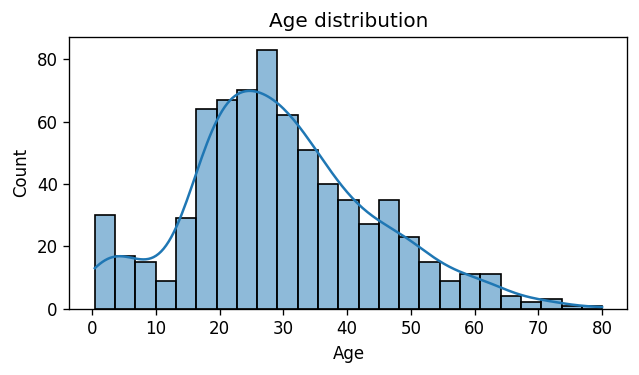

In [165]:
# Age histogram

plt.figure(figsize=(6, 3), dpi=120)
sns.histplot(data=df,
             x=df.Age,
             bins=25,
             kde=True)
plt.xlabel('Age')
plt.title('Age distribution')
plt.show()

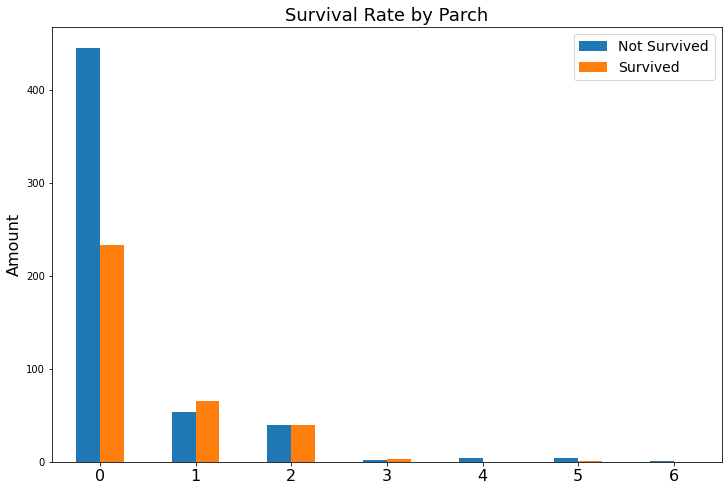

In [166]:
# Survival Rate by Parch

pd.crosstab(df['Parch'], df['Survived']).plot(kind='bar', figsize=(12,8))
plt.legend(['Not Survived', 'Survived'],fontsize=14)
plt.ylabel('Amount', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=16)
plt.title('Survival Rate by Parch', fontsize=18)
plt.show()

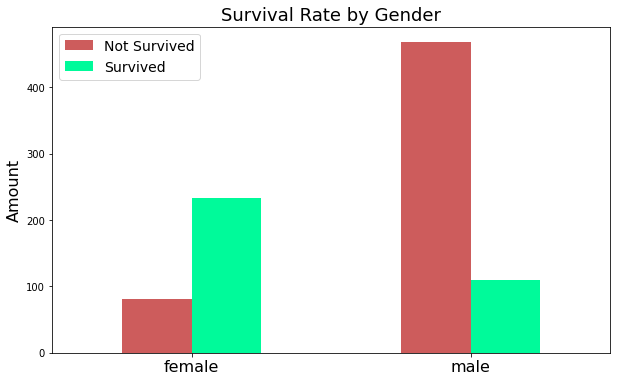

In [167]:
# Survival Rate by Gender

pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', color=['indianred', 'mediumspringgreen'], figsize=(10,6))
plt.legend(['Not Survived', 'Survived'],fontsize=14)
plt.ylabel('Amount', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=16)
plt.title('Survival Rate by Gender', fontsize=18)
plt.show()

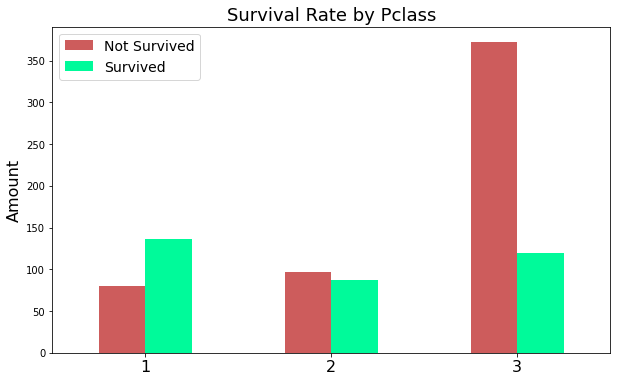

In [168]:
# Survival Rate by Pclass

pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', color=['indianred', 'mediumspringgreen'], figsize=(10,6))
plt.legend(['Not Survived', 'Survived'],fontsize=14)
plt.ylabel('Amount', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=16)
plt.title('Survival Rate by Pclass', fontsize=18)
plt.show()

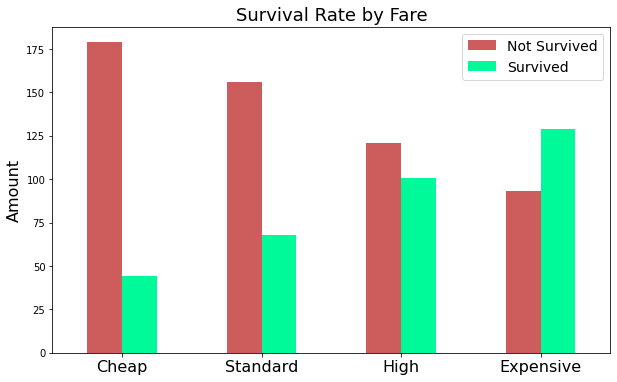

In [169]:
# Survival Rate by Tiket Price
# We will divide the Fare column in 3 categories, Low, Medium , High, in order to check if the survival rate was influenced by the tiket price

categories = ['Cheap', 'Standard', 'High', 'Expensive']
df['Fare'] = pd.qcut(df.Fare, len(categories), labels=categories)

pd.crosstab(df['Fare'], df['Survived']).plot(kind='bar', color=['indianred', 'mediumspringgreen'], figsize=(10,6))
plt.legend(['Not Survived', 'Survived'],fontsize=14)
plt.ylabel('Amount', fontsize=16)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=16)
plt.title('Survival Rate by Fare', fontsize=18)
plt.show()

**Features Engineering**

In [170]:
# Drop columns that are not usefull anymore

df.drop(['Ticket'], axis=1, inplace=True)

In [171]:
# Extracting the name titles

df.Name = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

for idx, value in enumerate(df['Name']):
  if df.iloc[idx].Name in ['Dr', 'Rev', 'Major', 'Col', 'Capt']:
    df.loc[df['Name'] == value, 'Name'] = 'Crew'
  elif df.iloc[idx].Name in ['Jonkheer', 'Don', 'Sir', 'the Countess', 'Lady']:
    df.loc[df['Name'] == value, 'Name'] = 'Majestic'
  elif df.iloc[idx].Name in ['Mme', 'Ms']:
    df.loc[df['Name'] == value, 'Name'] = 'Mrs'
  elif df.iloc[idx].Name in ['Mlle']:
    df.loc[df['Name'] == value, 'Name'] = 'Miss'

In [172]:
# Keeping only the first letter of the Cabin column to make it more relevant and filling the cabin NaN values with 0

df['Cabin'].fillna(value='0', inplace=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x[:1])


In [173]:
# We will divide the Age column in 3 categories

df['Age'].fillna(df['Age'].mean().round(), inplace=True)
categories = ['Age1', 'Age2', 'Age3', 'Age4']
df['Age'] = pd.qcut(df.Age, len(categories), labels=categories)

In [174]:
# Change the string dtype columns into category dtype columns so we can can convert them to numbers

# for label, content in df.items():
#   if not pd.api.types.is_numeric_dtype(content):
#     df[label] = content.astype('category')
#     df[label] = pd.Categorical(content).codes + 1

In [175]:
# One hot encoding

one_hot_encoded_data = pd.get_dummies(df, columns = ['Sex', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])


In [176]:
one_hot_encoded_data

,PassengerId,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Name_Crew,Name_Majestic,Name_Master,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
888,889,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [177]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr,male,Age1,1,0,Cheap,0,S
1,2,1,1,Mrs,female,Age4,1,0,Expensive,C,C
2,3,1,3,Miss,female,Age2,0,0,Standard,0,S
3,4,1,1,Mrs,female,Age3,1,0,Expensive,C,S
4,5,0,3,Mr,male,Age3,0,0,Standard,0,S


#**Modelling**

In [178]:
# Split the data

X = one_hot_encoded_data.drop('Survived', axis=1) 
y = one_hot_encoded_data['Survived']

In [179]:
# Train the model (Trying 3 different models)

models = {
    'LG': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X, y)
  print(f'The score for {name}, is: {model.score(X, y)}')

The score for LG, is: 0.8406285072951739
The score for KNN, is: 0.7182940516273849
The score for RF, is: 1.0


In [180]:
# Tuning Random Forest Classifier model since it had the best performance

grid_params = {
    'n_estimators': [100, 250, 500],
    'min_samples_split': [4, 6, 8, 10],
    'min_samples_leaf': [4, 6, 8, 10],
    'max_features': [None, 'sqrt']
    }

gs_clf = GridSearchCV(RandomForestClassifier(),
                      param_grid=grid_params,
                      cv=5,
                      verbose=True)

gs_clf.fit(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [4, 6, 8, 10],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [100, 250, 500]},
             verbose=True)

In [181]:
# Check the best parameters

gs_clf.best_params_ 

{'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 250}

**Importance of the Features**

In [182]:
features_imp = gs_clf.best_estimator_.feature_importances_

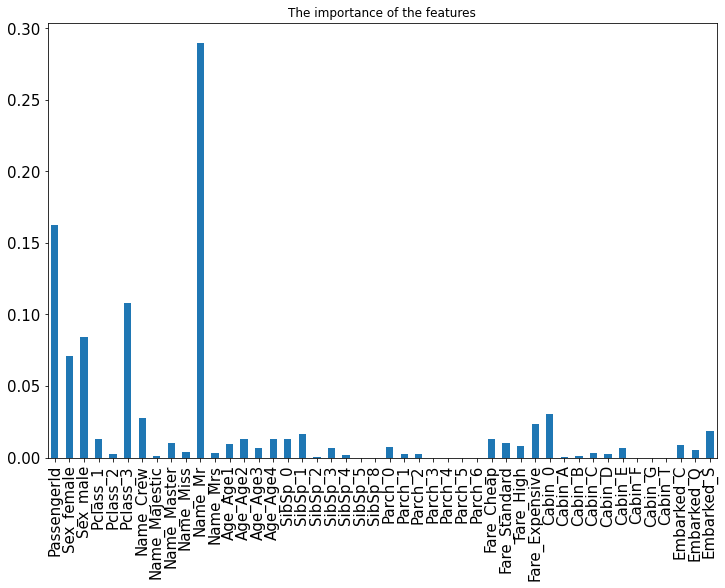

In [183]:
features_imp_dictionary = dict(zip(X.columns, features_imp))
features_imp_df = pd.DataFrame(features_imp_dictionary, index=[0])
features_imp_df.T.plot(kind='bar', title='The importance of the features', legend=False, figsize=(12,8), fontsize=15);

**Predict on the test dataset**

In [184]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/test.csv')

df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [185]:
# Features Engineering

df_test.drop(['Ticket'], axis=1, inplace=True)

df_test['Age'].fillna(df_test['Age'].mean().round(), inplace=True)
categories = ['Age1', 'Age2', 'Age3', 'Age4']
df_test['Age'] = pd.qcut(df_test.Age, len(categories), labels=categories)

categories = ['Cheap', 'Standard', 'High', 'Expensive']
df_test['Fare'] = pd.qcut(df_test.Fare, len(categories), labels=categories)
df_test['Fare'].fillna('Standard', inplace=True)

df_test['Cabin'].fillna(value='0', inplace=True)
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: x[:1])

df_test.Name = df_test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

for idx, value in enumerate(df_test['Name']):
  if df_test.iloc[idx].Name in ['Dr', 'Rev', 'Major', 'Col', 'Capt']:
    df_test.loc[df_test['Name'] == value, 'Name'] = 'Crew'
  elif df_test.iloc[idx].Name in ['Jonkheer', 'Don', 'Sir', 'the Countess', 'Lady']:
    df_test.loc[df_test['Name'] == value, 'Name'] = 'Majestic'
  elif df_test.iloc[idx].Name in ['Mme', 'Ms']:
    df_test.loc[df_test['Name'] == value, 'Name'] = 'Mrs'
  elif df_test.iloc[idx].Name in ['Mlle']:
    df_test.loc[df_test['Name'] == value, 'Name'] = 'Miss'

In [186]:
# Change the string dtype columns into category dtype columns so we can can convert them to numbers

# for label, content in df_test.items():
#   if not pd.api.types.is_numeric_dtype(content):
#     df_test[label] = content.astype('category')
#     df_test[label] = pd.Categorical(content).codes + 1

In [187]:
# One hot encoding

one_hot_encoded_test_data = pd.get_dummies(df_test, columns = ['Sex', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])

In [188]:
# Make the predictions

test_preds = gs_clf.predict(one_hot_encoded_test_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Name_Dona
- Parch_9
Feature names seen at fit time, yet now missing:
- Cabin_T
- Name_Majestic

  warnings.warn(message, FutureWarning)


In [189]:
# Format the predictions in a pandas Series

df_preds = pd.DataFrame(data=test_preds, index=df_test['PassengerId'], columns=['Survived'])
df_preds

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [190]:
# Save the predictions into a csv file

df_preds.to_csv('titanic_predictions.csv')